# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn import svm, metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

In [29]:
%ls ../data/am_pm.csv

../data/am_pm.csv


In [30]:
df = pd.read_csv('../data/am_pm.csv', index_col='date')
df.head(10)

,am,pm,target,predict
date,,,,
2020-04-17,21.0,2.0,working_day,weekend
2020-04-18,1.0,68.0,weekend,working_day
2020-04-19,18.0,15.0,weekend,working_day
2020-04-20,2.0,23.0,working_day,working_day
2020-04-21,0.0,25.0,working_day,working_day
2020-04-22,0.0,28.0,working_day,working_day
2020-04-23,10.0,33.0,working_day,working_day
2020-04-24,2.0,14.0,working_day,working_day
2020-04-25,30.0,74.0,weekend,working_day


1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

### Train logistic regression again

In [31]:
X = df[['am', 'pm']].values
y = df['target'].values

logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

### Draw the prots

In [32]:
sns.set(rc = {'figure.figsize':(15,8)})

In [35]:
def plot_decision_boundary(X, pred_func, h=1):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
    y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = np.array(pred_func(np.c_[xx.ravel(), yy.ravel()]))
    Z = (Z == 'working_day')
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)

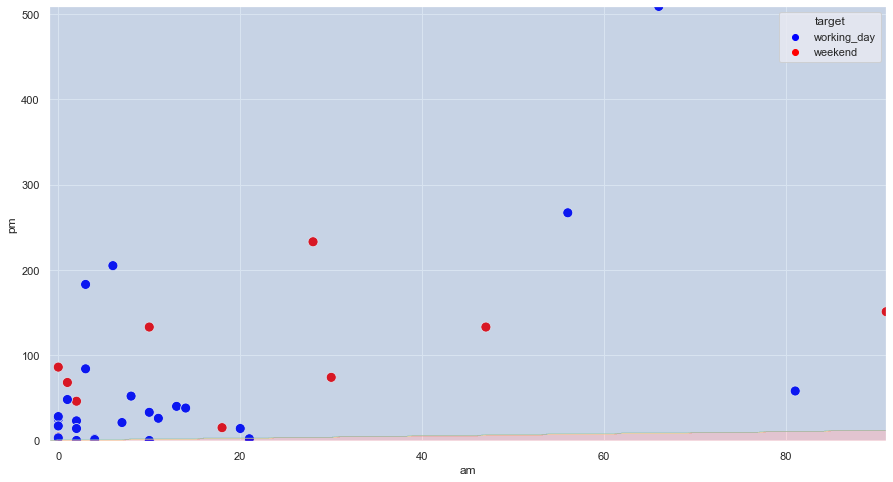

In [36]:
fig, ax = plt.subplots()

# Plot the data
sns.scatterplot(x='am', y='pm', data=df,
                hue='target', s=100,
                ax=ax, palette={'working_day': 'blue', 'weekend': 'red'}
               )

# draw boundary
plot_decision_boundary(X, lambda x: logreg.predict(x))

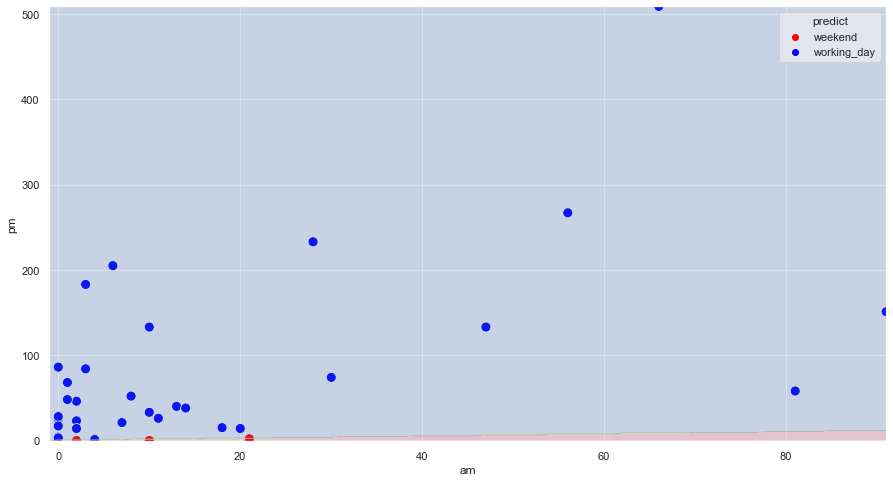

In [37]:
fig, ax = plt.subplots()

# Plot the data
sns.scatterplot(x='am', y='pm', data=df,
                hue='predict', s=100,
                ax=ax, palette={'working_day': 'blue', 'weekend': 'red'}
               )

# draw boundary
plot_decision_boundary(X, lambda x: logreg.predict(x))

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [38]:
std_scaller = StandardScaler()
X = std_scaller.fit_transform(X)

logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [39]:
y_pred = logreg.predict(X)

In [40]:
print("Accuracy with scaled features:",metrics.accuracy_score(df['target'], y_pred))

Accuracy with scaled features: 0.7428571428571429


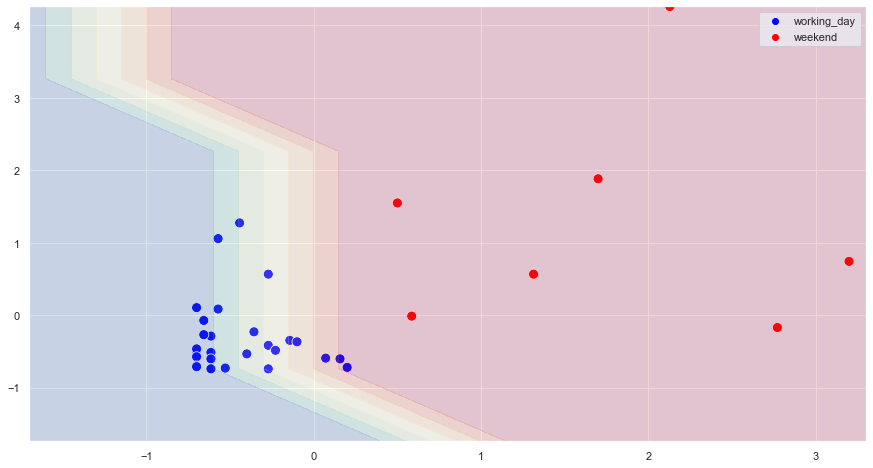

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots()

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=y_pred, s=100,
                ax=ax, palette={'working_day': 'blue', 'weekend': 'red'}
               )

# draw boundary
plot_decision_boundary(X, lambda x: logreg.predict(x))


## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [42]:
svc_rbf = svm.SVC(probability=True, random_state=21)

svc_rbf.fit(X, y)

SVC(probability=True, random_state=21)

In [43]:
y_pred = svc_rbf.predict(X)

In [44]:
print("Accuracy with scaled features:",metrics.accuracy_score(df['target'], y_pred))

Accuracy with scaled features: 0.7428571428571429


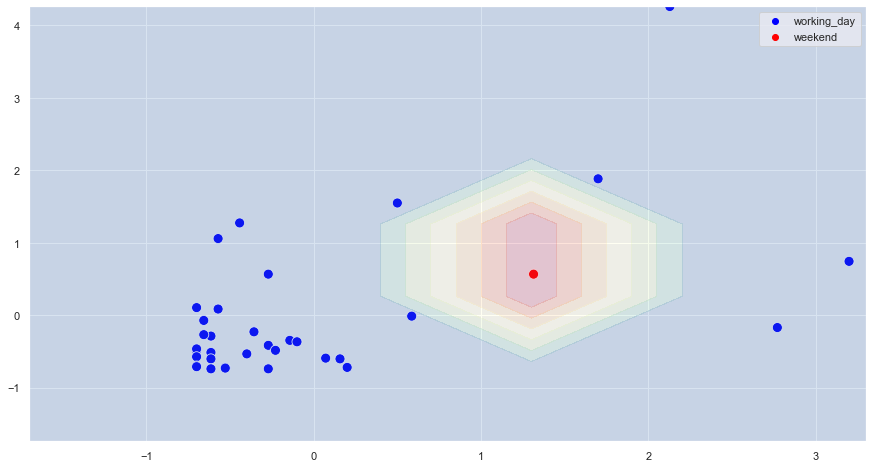

In [45]:
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots()

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=y_pred, s=100,
                ax=ax, palette={'working_day': 'blue', 'weekend': 'red'}
               )

# draw boundary
plot_decision_boundary(X, lambda x: svc_rbf.predict(x))


In [46]:
svc_linear = svm.SVC(probability=True, random_state=21)

svc_linear.fit(X, y)

SVC(probability=True, random_state=21)

In [47]:
y_pred = svc_linear.predict(X)

In [48]:
print("Accuracy with scaled features:",metrics.accuracy_score(df['target'], y_pred))

Accuracy with scaled features: 0.7428571428571429


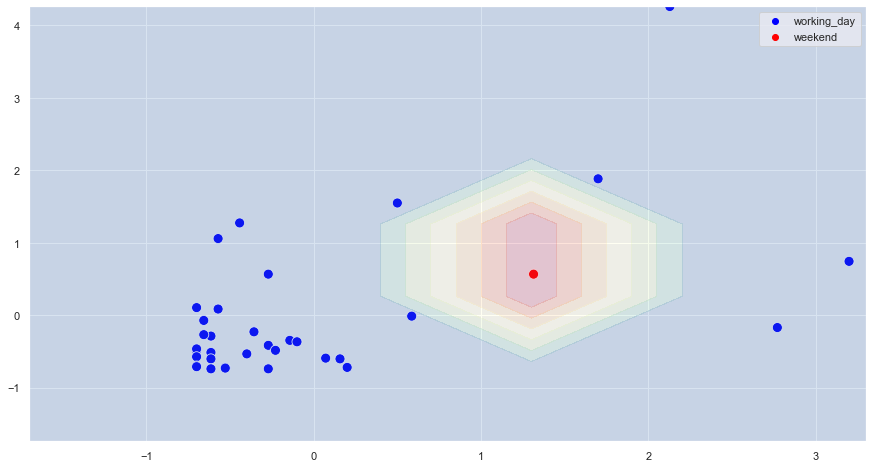

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots()

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=y_pred, s=100,
                ax=ax, palette={'working_day': 'blue', 'weekend': 'red'}
               )

# draw boundary
plot_decision_boundary(X, lambda x: svc_linear.predict(x))


## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [50]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

tree.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [51]:
y_pred = tree.predict(X)

In [52]:
print("Accuracy with scaled features:",metrics.accuracy_score(df['target'], y_pred))

Accuracy with scaled features: 0.9428571428571428


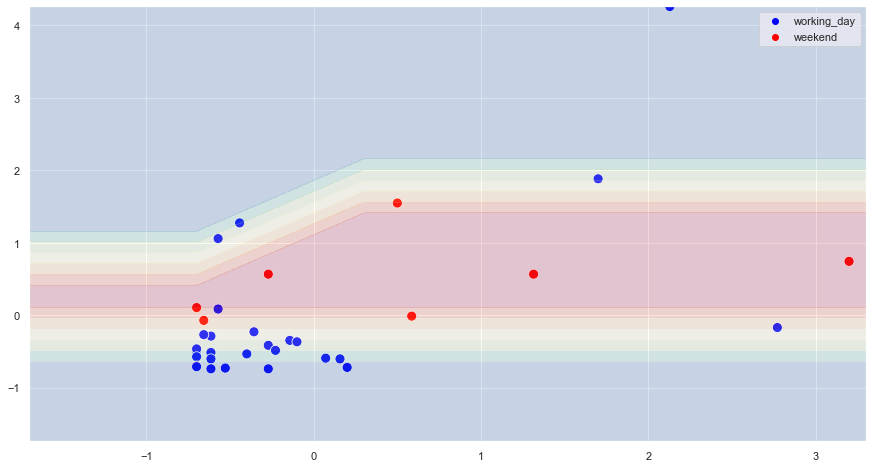

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots()

# Plot the data
sns.scatterplot(x=X[:, 0], y=X[:, 1],
                hue=y_pred, s=100,
                ax=ax, palette={'working_day': 'blue', 'weekend': 'red'}
               )

# draw boundary
plot_decision_boundary(X, lambda x: tree.predict(x))

[Text(0.40625, 0.9, 'X[1] <= -0.121\ngini = 0.408\nsamples = 35\nvalue = [10, 25]\nclass = weekend'),
 Text(0.125, 0.7, 'X[1] <= -0.705\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = weekend'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = weekend'),
 Text(0.1875, 0.5, 'X[1] <= -0.651\ngini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = weekend'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = working_day'),
 Text(0.25, 0.3, 'X[0] <= -0.013\ngini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = weekend'),
 Text(0.1875, 0.1, 'gini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = weekend'),
 Text(0.3125, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = weekend'),
 Text(0.6875, 0.7, 'X[1] <= 0.9\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = working_day'),
 Text(0.5625, 0.5, 'X[0] <= -0.42\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = working_day'),
 Text(0.5, 0.3, 'X[0] <= -0.613\ngini = 0.444\nsamples = 3\nvalue = [2,

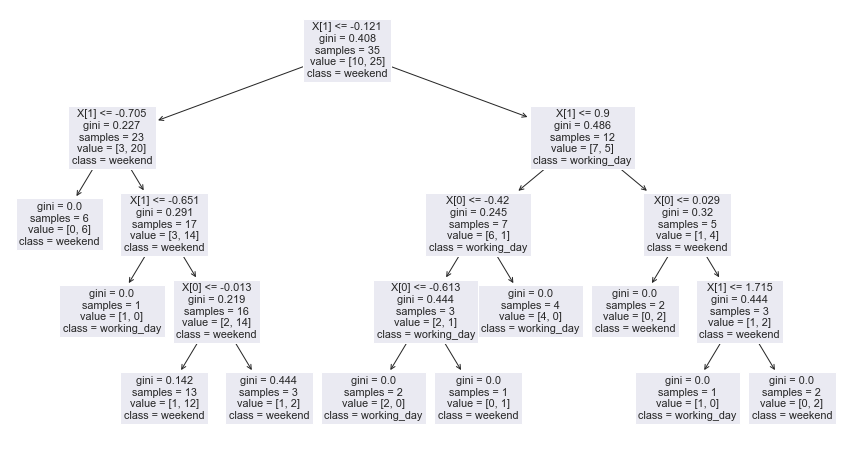

In [54]:
plot_tree(tree, class_names=y)

### How many leaves in the visualized tree label days as working days?

The anwser is: 4